In [49]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('water_potability.csv')

In [51]:
# Preprocessing
df.interpolate(inplace=True, method='linear', axis=0, limit_direction='both')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,364.639673,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,360.762904,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [53]:
# Dropping the target column
X = df.drop('Potability', axis=1).values

In [54]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.clip(X, -5, 5)


In [55]:
# Create a KMeans model with 3 clusters (3 is an arbitrary number)
kmeans = KMeans(n_clusters=3)

In [56]:
# Fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=3)

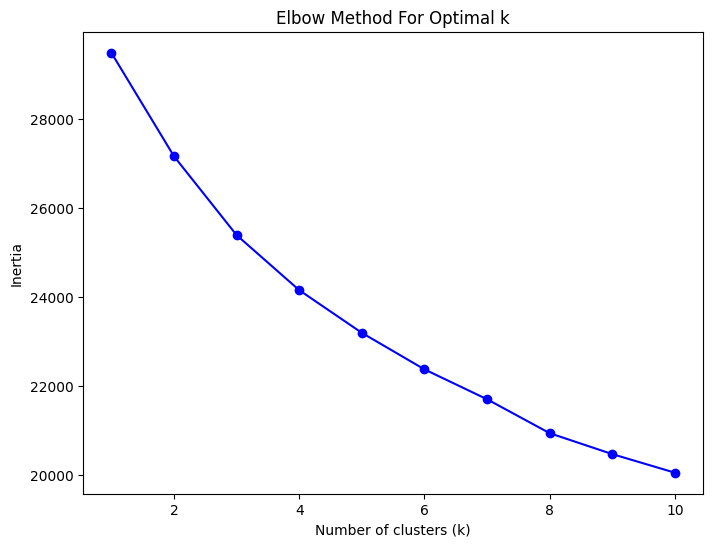

In [57]:
import matplotlib.pyplot as plt

# Calculate the sum of squared distances for different values of k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [58]:
# Calculate the differences in inertia
inertia_diff = np.diff(inertia)

# Calculate the second derivative of inertia
inertia_diff2 = np.diff(inertia_diff)

# Find the index of the maximum second derivative
optimal_k = np.argmax(inertia_diff2) + 2  # +2 because np.diff reduces the length by 1 each time

print(f'The optimal number of clusters (k) is: {optimal_k}')

The optimal number of clusters (k) is: 2
